In [11]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from PIL import Image

In [12]:
# Load pretrained convnet
model = keras.applications.vgg16.VGG16(
    include_top=True, 
    weights='imagenet', 
    input_tensor=None,
    input_shape=None, 
    pooling=None, 
    classes=1000,
    classifier_activation='softmax'
)

In [13]:
filename = "dog.png"
image = Image.open(filename)
print(image.size)

image = np.asarray(image.resize((224, 224))) # resize to 224 * 224 (W * H), np.asarray returns (H, W, C)
img_orig = image
image = image[np.newaxis, :, :, :]  # add one dim to (1, C, H, W)

(800, 965)


In [14]:
image.shape

(1, 224, 224, 3)

In [19]:
occluding_size = 75
occluding_pixel = 0
occluding_stride = 15

_, height, width, _= image.shape

output_height = int(math.ceil((height-occluding_size)/occluding_stride+1))
output_width = int(math.ceil((width-occluding_size)/occluding_stride+1))

heatmap = np.zeros((output_height, output_width))

for h in range(output_height):
    for w in range(output_width):
        #occluder region
        h_start = h * occluding_stride
        w_start = w * occluding_stride
        h_end = min(height, h_start + occluding_size)
        w_end = min(width, w_start + occluding_size)

        input_image = np.array(image, copy=True) 
        input_image[:, h_start:h_end, w_start:w_end, :] =  occluding_pixel
        probs = model.predict(input_image)[0]
        heatmap[h,w] = probs[9] # the probability of the correct class

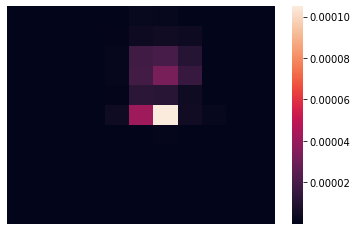

In [20]:
fig = sns.heatmap(heatmap,xticklabels=False, yticklabels=False)
plt.show()

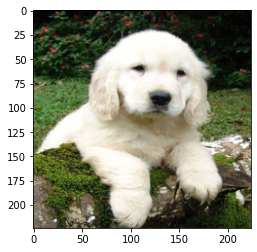

In [15]:
#Original image
plt.imshow(img_orig)
plt.show()